In [195]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway
from datetime import datetime, time, timedelta
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde, skew
from collections import Counter

In [196]:
df = pd.read_csv("Train.csv")
df.head(10)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
5,0x9bb4,HYDRES09DEL03,22,4.8,17.431668,78.408321,17.461668,78.438321,11-03-2022,21:20:00,21:30:00,conditions Cloudy,Jam,0,Buffet,motorcycle,1,No,Urban,(min) 26
6,0x95b4,RANCHIRES15DEL01,33,4.7,23.369746,85.339820,23.479746,85.449820,04-03-2022,19:15:00,19:30:00,conditions Fog,Jam,1,Meal,scooter,1,No,Metropolitian,(min) 40
7,0x9eb2,MYSRES15DEL02,35,4.6,12.352058,76.606650,12.482058,76.736650,14-03-2022,17:25:00,17:30:00,conditions Cloudy,Medium,2,Meal,motorcycle,1,No,Metropolitian,(min) 32
8,0x1102,HYDRES05DEL02,22,4.8,17.433809,78.386744,17.563809,78.516744,20-03-2022,20:55:00,21:05:00,conditions Stormy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 34
9,0xcdcd,DEHRES17DEL01,36,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55:00,22:10:00,conditions Fog,Jam,2,Snack,motorcycle,3,No,Metropolitian,(min) 46


In [197]:
print(f"Total Observations (rows): {df.shape[0]}")
print(f"Total Features (columns): {df.shape[1]}")


Total Observations (rows): 45593
Total Features (columns): 20


##  **Data Cleaning**

In [198]:
print(df.dtypes)

ID                              object
Delivery_person_ID              object
Delivery_person_Age             object
Delivery_person_Ratings         object
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Order_Date                      object
Time_Orderd                     object
Time_Order_picked               object
Weatherconditions               object
Road_traffic_density            object
Vehicle_condition                int64
Type_of_order                   object
Type_of_vehicle                 object
multiple_deliveries             object
Festival                        object
City                            object
Time_taken(min)                 object
dtype: object


In [199]:
#Renaming Weatherconditions column
df.rename(columns={'Weatherconditions':'Weather_conditions', 'Time_Orderd': 'Time_Ordered'},inplace=True)
#Renaming City column
df.rename(columns={'City': 'Area_Type'}, inplace=True)
df['Area_Type'] = df['Area_Type'].replace({'Metropolitian': 'Metropolitan'})

In [200]:
print(df['Time_taken(min)'].iloc[:5])

0    (min) 24
1    (min) 33
2    (min) 26
3    (min) 21
4    (min) 30
Name: Time_taken(min), dtype: object


In [201]:
#Extract time and convert it to int
df['Time_taken(min)'] = df['Time_taken(min)'].astype(str).str.extract(r'(\d+)').astype(int)

In [202]:
print(df["Weather_conditions"].unique())

['conditions Sunny' 'conditions Stormy' 'conditions Sandstorms'
 'conditions Cloudy' 'conditions Fog' 'conditions Windy' 'conditions NaN']


In [203]:
df["Weather_conditions"] = df["Weather_conditions"].apply(lambda x: x.split(' ')[1].strip())

In [204]:
def convert_time_whith_date(df):
    df['Time_Order_picked'] = pd.to_datetime(df['Time_Order_picked'], format='%H:%M:%S', errors='coerce')
    df['Time_Ordered'] = pd.to_datetime(df['Time_Ordered'], format='%H:%M:%S', errors='coerce')
def convert_time_whithout_date(df):
    df['Time_Order_picked'] = pd.to_datetime(df['Time_Order_picked'], format='%H:%M:%S', errors='coerce').dt.time
    df['Time_Ordered'] = pd.to_datetime(df['Time_Ordered'], format='%H:%M:%S', errors='coerce').dt.time

In [205]:
#Update DataType
df['Delivery_person_Age'] = pd.to_numeric(df['Delivery_person_Age'], errors='coerce')
df['Delivery_person_Ratings'] = pd.to_numeric(df['Delivery_person_Ratings'], errors='coerce')
df['Road_traffic_density'] = df['Road_traffic_density'].str.strip()
df['Festival'] = df['Festival'].str.strip()
df['Type_of_vehicle'] = df['Type_of_vehicle'].str.strip()
df['Area_Type'] = df['Area_Type'].str.strip()
df['Type_of_order'] = df['Type_of_order'].str.strip()
df['multiple_deliveries'] = pd.to_numeric(df['multiple_deliveries'], errors='coerce')
df['Order_Date']=pd.to_datetime(df['Order_Date'], format="%d-%m-%Y")
convert_time_whithout_date(df)

In [206]:
#Drop Unused Columns
df.drop(['ID'], axis=1, inplace=True)

In [207]:
#Check for Duplicate Values
if (len(df[df.duplicated()])>0):
    print("Duplicate values found in the data.")
    df.drop_duplicates(inplace=True)
else:
    print("No duplicate values detected in the data.")

No duplicate values detected in the data.


In [208]:
#Convert string 'NaN' to np.nan
df.replace("NaN", float(np.nan), regex=True, inplace=True)

In [209]:
df.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,...,Type_of_vehicle,multiple_deliveries,Festival,Area_Type,Time_taken(min)
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,...,motorcycle,0.0,No,Urban,24
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,...,scooter,1.0,No,Metropolitian,33
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,...,motorcycle,1.0,No,Urban,26
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,...,motorcycle,1.0,No,Metropolitian,21
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,...,scooter,1.0,No,Metropolitian,30


In [210]:
columns = ['Time_taken(min)', 'Delivery_person_Age', 'Delivery_person_Ratings']
df[columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Time_taken(min),45593.0,26.294607,9.383806,10.0,19.0,26.0,32.0,54.0
Delivery_person_Age,43739.0,29.567137,5.815155,15.0,25.0,30.0,35.0,50.0
Delivery_person_Ratings,43685.0,4.633780,0.334716,1.0,4.5,4.7,4.9,6.0


In [211]:
columns = ['Area_Type', 'Festival','Type_of_order', 'Type_of_vehicle','Weather_conditions', 'Road_traffic_density']
df[columns].describe().T

,count,unique,top,freq
Area_Type,44393,3,Metropolitian,34093
Festival,45365,2,No,44469
Type_of_order,45593,4,Snack,11533
Type_of_vehicle,45593,4,motorcycle,26435
Weather_conditions,44977,6,Fog,7654
Road_traffic_density,44992,4,Low,15477


In [212]:
for col in columns:
    print(f"{col} : {df[col].unique()}")

Area_Type : ['Urban' 'Metropolitian' 'Semi-Urban' nan]
Festival : ['No' 'Yes' nan]
Type_of_order : ['Snack' 'Drinks' 'Buffet' 'Meal']
Type_of_vehicle : ['motorcycle' 'scooter' 'electric_scooter' 'bicycle']
Weather_conditions : ['Sunny' 'Stormy' 'Sandstorms' 'Cloudy' 'Fog' 'Windy' nan]
Road_traffic_density : ['High' 'Jam' 'Low' 'Medium' nan]


In [213]:
convert_time_whith_date(df)
#df.insert(9, 'Pickup_delay', df['Time_Order_picked'] - df['Time_Ordered'])
min_date = df['Order_Date'].min()
max_date = df['Order_Date'].max()
print("Min Date:", min_date)
print("Max Date:", max_date)
convert_time_whithout_date(df)

Min Date: 2022-02-11 00:00:00
Max Date: 2022-04-06 00:00:00


In [214]:
df.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,...,Type_of_vehicle,multiple_deliveries,Festival,Area_Type,Time_taken(min)
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,...,motorcycle,0.0,No,Urban,24
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,...,scooter,1.0,No,Metropolitian,33
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,...,motorcycle,1.0,No,Urban,26
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,...,motorcycle,1.0,No,Metropolitian,21
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,...,scooter,1.0,No,Metropolitian,30


In [215]:
#Check null values
def checkNull():
    missing = df.isnull().sum()
    missing = missing[missing > 0].sort_values(ascending=False)
    print(missing)
checkNull()

Delivery_person_Ratings    1908
Delivery_person_Age        1854
Time_Ordered               1731
Area_Type                  1200
multiple_deliveries         993
Weather_conditions          616
Road_traffic_density        601
Festival                    228
dtype: int64


In [216]:
def fill_ratings(ratings):
    skewness = ratings.dropna().skew()
    if -0.5 <= skewness <= 0.5:
        return ratings.fillna(ratings.mean())
    else:
        return ratings.fillna(ratings.median())
df['Delivery_person_Ratings'] = df.groupby('Delivery_person_ID')['Delivery_person_Ratings'].transform(fill_ratings)
checkNull()

Delivery_person_Age     1854
Time_Ordered            1731
Area_Type               1200
multiple_deliveries      993
Weather_conditions       616
Road_traffic_density     601
Festival                 228
dtype: int64


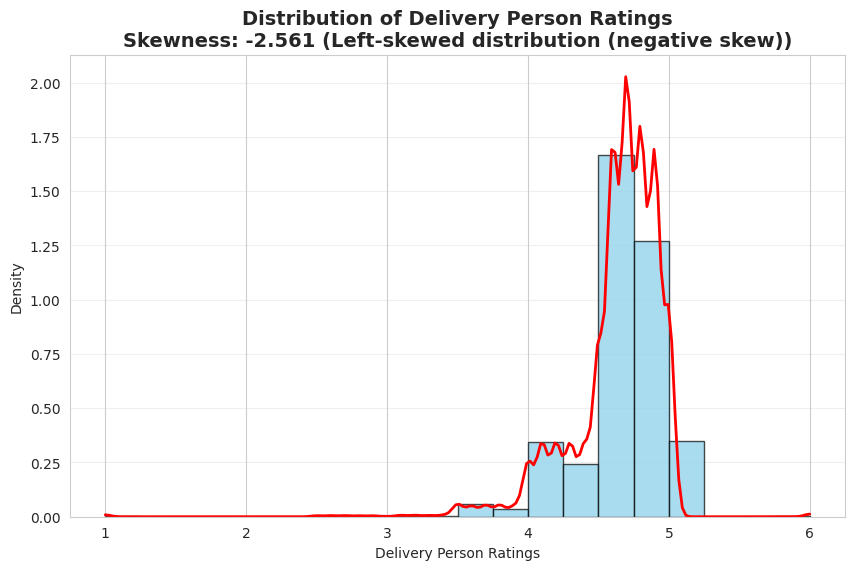

In [217]:
ratings = df['Delivery_person_Ratings']

sk = skew(ratings)
sk_rounded = round(sk, 3)

if abs(sk) < 0.1:
    interpretation = "Approximately symmetric distribution"
elif sk > 0:
    interpretation = "Right-skewed distribution (positive skew)"
else:
    interpretation = "Left-skewed distribution (negative skew)"

plt.figure(figsize=(10,6))

count, bins, ignored = plt.hist(ratings, bins=20, density=True, color='skyblue', edgecolor='black', alpha=0.7)

kde = gaussian_kde(ratings)
x_vals = np.linspace(min(ratings), max(ratings), 200)
plt.plot(x_vals, kde(x_vals), color='red', linewidth=2)

plt.title(f"Distribution of Delivery Person Ratings\nSkewness: {sk_rounded} ({interpretation})", fontsize=14, weight='bold')

plt.xlabel("Delivery Person Ratings")
plt.ylabel("Density")
plt.grid(axis='y', alpha=0.3)
plt.show()



In [218]:
df['Delivery_person_Age'] = df.groupby('Delivery_person_ID')['Delivery_person_Age'].transform(
    lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else x.mean())
)
checkNull()

Time_Ordered            1731
Area_Type               1200
multiple_deliveries      993
Weather_conditions       616
Road_traffic_density     601
Festival                 228
dtype: int64


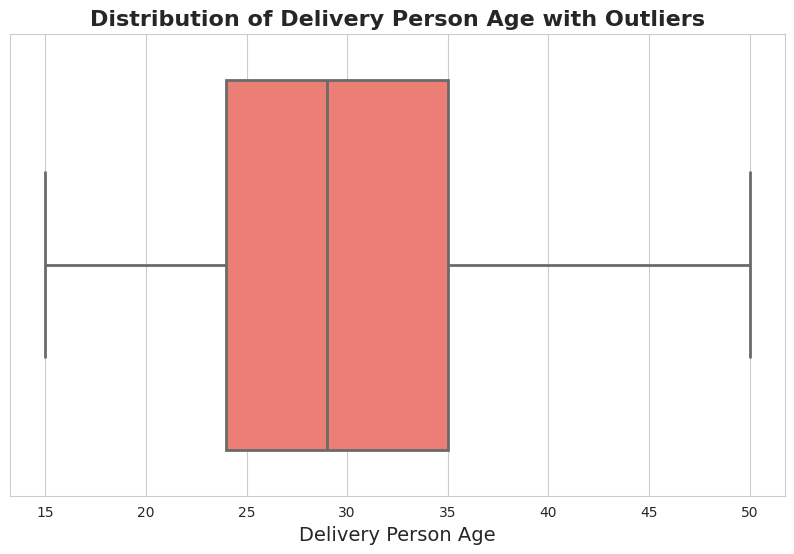



Detected outliers for Delivery Person Age: no one


In [219]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
ax = sns.boxplot(
    x=df['Delivery_person_Age'],
    color="#FF6F61",
    fliersize=8,
    linewidth=2
)
ax.set_title("Distribution of Delivery Person Age with Outliers", fontsize=16, fontweight='bold')
ax.set_xlabel("Delivery Person Age", fontsize=14)

outliers = df['Delivery_person_Age'][
    (df['Delivery_person_Age'] < (df['Delivery_person_Age'].quantile(0.25) - 1.5 * (df['Delivery_person_Age'].quantile(0.75) - df['Delivery_person_Age'].quantile(0.25)))) |
    (df['Delivery_person_Age'] > (df['Delivery_person_Age'].quantile(0.75) + 1.5 * (df['Delivery_person_Age'].quantile(0.75) - df['Delivery_person_Age'].quantile(0.25))))
]

plt.show()
print(f"\n\nDetected outliers for Delivery Person Age: {outliers.values if len(outliers) != 0 else "no one"}")

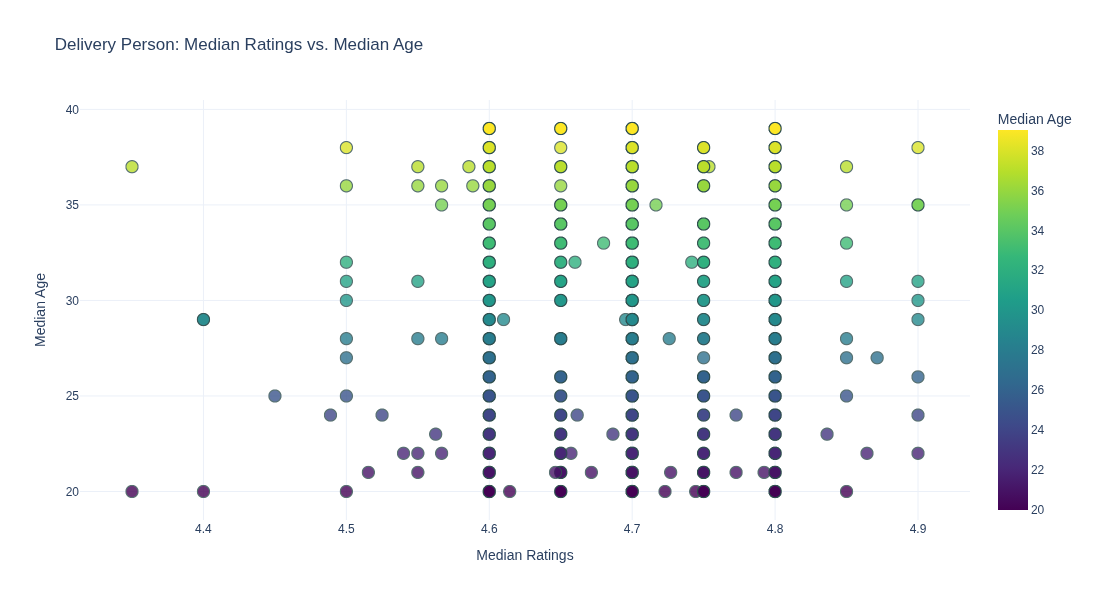

In [220]:
df_summary = df.groupby('Delivery_person_ID').agg({
    'Delivery_person_Ratings': 'median',
    'Delivery_person_Age': lambda x: x.mode().iloc[0]
}).reset_index()

fig = px.scatter(
    df_summary,
    x='Delivery_person_Ratings',
    y='Delivery_person_Age',
    hover_data=['Delivery_person_ID'],
    title='Delivery Person: Median Ratings vs. Median Age',
    labels={
        'Delivery_person_Ratings': 'Median Ratings',
        'Delivery_person_Age': 'Median Age'
    },
    color='Delivery_person_Age',
    color_continuous_scale=px.colors.sequential.Viridis,
    size_max=15,
    height=600,
    width=800
)

fig.update_traces(marker=dict(size=12, opacity=0.8, line=dict(width=1, color='DarkSlateGrey')))
fig.update_layout(template='plotly_white')
fig.show()

In [221]:
df['Time_Ordered_dt'] = pd.to_datetime(df['Time_Ordered'].astype(str), format='%H:%M:%S', errors='coerce')
df['Time_Order_picked_dt'] = pd.to_datetime(df['Time_Order_picked'].astype(str), format='%H:%M:%S', errors='coerce')
df['Pickup_delay'] = np.nan
mask = df['Time_Ordered_dt'].notna() & df['Time_Order_picked_dt'].notna()
df.loc[mask, 'Pickup_delay'] = (df.loc[mask, 'Time_Order_picked_dt'] - df.loc[mask, 'Time_Ordered_dt']).dt.total_seconds() / 60
df.drop(columns=['Time_Ordered_dt', 'Time_Order_picked_dt'], inplace=True)

In [222]:
df_anova = df.dropna(subset=['Pickup_delay', 'Type_of_order'])
groups_order = [group['Pickup_delay'].values for name, group in df_anova.groupby('Type_of_order')]
F_order, p_order = f_oneway(*groups_order)
if (p_order < 0.05):
    print("Pickup_delay depends of Type_of_order")
else:
    print("Pickup_delay does not depends of Type_of_order")

Pickup_delay depends of Type_of_order


In [223]:
df_anova_vehicle = df.dropna(subset=['Pickup_delay', 'Type_of_vehicle'])
groups_vehicle = [group['Pickup_delay'].values for name, group in df_anova_vehicle.groupby('Type_of_vehicle')]
F_vehicle, p_vehicle = f_oneway(*groups_vehicle)
if (p_vehicle < 0.05):
    print("Pickup_delay depends of Type_of_vehicle")
else:
    print("Pickup_delay does not depends of Type_of_vehicle")

Pickup_delay does not depends of Type_of_vehicle


In [224]:
skewness = df['Pickup_delay'].dropna().skew()
if ( -0.5 <= skewness <= 0.5):
    print ("Use Mean")
else:
    print("Use Median")

Use Median


In [225]:
median_pickup_delay = df.groupby('Type_of_order')['Pickup_delay'].median()
def fill_values(row):
    order_type = row['Type_of_order']
    delay = median_pickup_delay.get(order_type, np.nan)
    if pd.isna(delay) or pd.isna(row['Time_Order_picked']):
        time_ordered_filled = row['Time_Ordered']
    else:
        dummy_date = pd.Timestamp('2023-01-01')
        time_order_picked_dt = pd.Timestamp.combine(dummy_date, row['Time_Order_picked'])
        new_time_ordered_dt = time_order_picked_dt - timedelta(minutes=delay)
        time_ordered_filled = new_time_ordered_dt.time()
    pickup_delay_filled = delay if pd.isna(row['Pickup_delay']) else row['Pickup_delay']

    return pd.Series([time_ordered_filled, pickup_delay_filled])

df[['Time_Ordered', 'Pickup_delay']] = df.apply(fill_values, axis=1)

In [226]:
checkNull()

Area_Type               1200
multiple_deliveries      993
Weather_conditions       616
Road_traffic_density     601
Festival                 228
dtype: int64


In [227]:
mode_val = df['multiple_deliveries'].dropna().mode().iloc[0]
df['multiple_deliveries'] = df['multiple_deliveries'].fillna(mode_val)
checkNull()

Area_Type               1200
Weather_conditions       616
Road_traffic_density     601
Festival                 228
dtype: int64


In [228]:
def datetime_to_numeric(row):
    if pd.isna(row['Order_Date']) or pd.isna(row['Time_Order_picked']):
        return np.nan
    dt = pd.to_datetime(row['Order_Date'])
    t = row['Time_Order_picked']
    dt_time = pd.Timestamp.combine(dt, t)
    return dt_time.timestamp()
df['datetime_num'] = df.apply(datetime_to_numeric, axis=1)
df['datetime_num'] = df['datetime_num'] - df['datetime_num'].min()
df['datetime_num'] = df['datetime_num'] / 3600

In [229]:
def knn_fill_cat(df, target_col, feature_col='datetime_num', k=5):
    missing_idx = df[df[target_col].isna()].index
    known_idx = df[df[target_col].notna()].index
    
    for idx in missing_idx:
        val_feat = df.loc[idx, feature_col]
        if pd.isna(val_feat):
            continue
        known_feats = df.loc[known_idx, feature_col]
        distances = abs(known_feats - val_feat)
        knn_indices = distances.nsmallest(k).index
        knn_values = df.loc[knn_indices, target_col]
        mode_val = Counter(knn_values).most_common(1)[0][0]
        df.at[idx, target_col] = mode_val
knn_fill_cat(df, 'Weather_conditions', k=5)
knn_fill_cat(df, 'Road_traffic_density', k=5)
knn_fill_cat(df, 'Festival', k=5)
df.drop(columns=['datetime_num'], inplace=True)

In [230]:
checkNull()

Area_Type    1200
dtype: int64


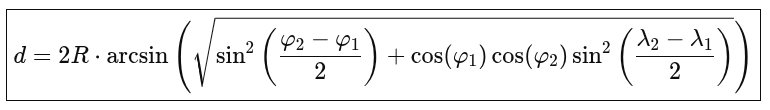


In [231]:
# phi : Latitude
# lambda : Longitude
def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371
    return c * r
df['Distance(Km)'] = df.apply(lambda row:haversine(row['Restaurant_latitude'],row['Restaurant_longitude'],row['Delivery_location_latitude'],row['Delivery_location_longitude']),axis=1)

In [232]:
#l’Écart Interquartile (IQR)
Q1 = df['Distance(Km)'].quantile(0.25)
Q3 = df['Distance(Km)'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1 = {Q1:.2f}, Q3 = {Q3:.2f}, IQR = {IQR:.2f}")
print(f"Lower Bound = {lower_bound:.2f}, Upper Bound = {upper_bound:.2f}")

Q1 = 4.66, Q3 = 13.76, IQR = 9.10
Lower Bound = -8.99, Upper Bound = 27.41


In [233]:
outliers = df[(df['Distance(Km)'] < 0) | (df['Distance(Km)'] > upper_bound)]
percent_outliers = (len(outliers) / len(df)) * 100

print(f"Number of outliers : {len(outliers)}")
print(f"Percentage of outlier values : {percent_outliers:.2f}%")

Number of outliers : 431
Percentage of outlier values : 0.95%


In [234]:
df = df[(df['Distance(Km)'] > 0) & (df['Distance(Km)'] <= upper_bound)]

In [149]:
def knn_fill_area_type(df, k=5):
    missing_idx = df[df['Area_Type'].isna()].index
    known_idx = df[df['Area_Type'].notna()].index
    
    for idx in missing_idx:
        lat1 = df.loc[idx, 'Restaurant_latitude']
        lon1 = df.loc[idx, 'Restaurant_longitude']
        distances = []
        for i in known_idx:
            lat2 = df.loc[i, 'Restaurant_latitude']
            lon2 = df.loc[i, 'Restaurant_longitude']
            dist = haversine(lat1, lon1, lat2, lon2)
            distances.append((i, dist))
        distances.sort(key=lambda x: x[1])
        knn_indices = [i for i, d in distances[:k]]
        knn_area_types = df.loc[knn_indices, 'Area_Type']
        most_common = Counter(knn_area_types).most_common(1)[0][0]
        df.at[idx, 'Area_Type'] = most_common

    return df

df = knn_fill_area_type(df, k=5)

In [150]:
checkNull()

Series([], dtype: int64)


In [151]:
def extract_date_features(data):
    data["Day"] = data.Order_Date.dt.day
    data["Month"] = data.Order_Date.dt.month
    data["Year"] = data.Order_Date.dt.year
    data['Day_of_week'] = data.Order_Date.dt.day_of_week.astype(int)
    data["Is_month_start"] = data.Order_Date.dt.is_month_start.astype(int)
    data["Is_month_end"] = data.Order_Date.dt.is_month_end.astype(int)
    data['Is_weekend'] = np.where(data['Day_of_week'].isin([5,6]),1,0)

extract_date_features(df)
df.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Ordered,Time_Order_picked,...,Time_taken(min),Pickup_delay,Distance(Km),Day,Month,Year,Day_of_week,Is_month_start,Is_month_end,Is_weekend
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:35:00,11:45:00,...,24,15.0,3.025149,19,3,2022,5,0,0,1
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:40:00,19:50:00,...,33,5.0,20.183530,25,3,2022,4,0,0,0
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:35:00,08:45:00,...,26,15.0,1.552758,19,3,2022,5,0,0,1
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,...,21,10.0,7.790401,5,4,2022,1,0,0,0
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:35:00,13:45:00,...,30,15.0,6.210138,26,3,2022,5,0,0,1


In [206]:
df.to_csv('CleanedData.csv', index=False)